In [1]:
%matplotlib inline
import os
import random
import numpy as np
import json
import matplotlib.pyplot
import pickle
from matplotlib.pyplot import imshow
from PIL import Image
from sklearn.manifold import TSNE

'2.2.3'

In [23]:
import rasterfairy


In [26]:
p = '/home/rte/re-imaging/visualisation/tSNE_cv.CV_2012.pkl'

filename = "tSNE_cuda_cs.CV_2012"

with open(p, "rb") as read_file:
    images, tsne = pickle.load(read_file)
    read_file.close()

In [19]:
images = images[:8000]
tsne = tsne[:8000]

In [27]:
images = images[:1000]
tsne = tsne[:1000]

In [ ]:
# nx * ny = 1000, the number of images
# nx = 100
# ny = 80

nx = 64
ny = 125

In [28]:
nx = 40
ny = 25

In [29]:
# assign to grid
grid_assignment = rasterfairy.transformPointCloud2D(tsne, target=(nx, ny))

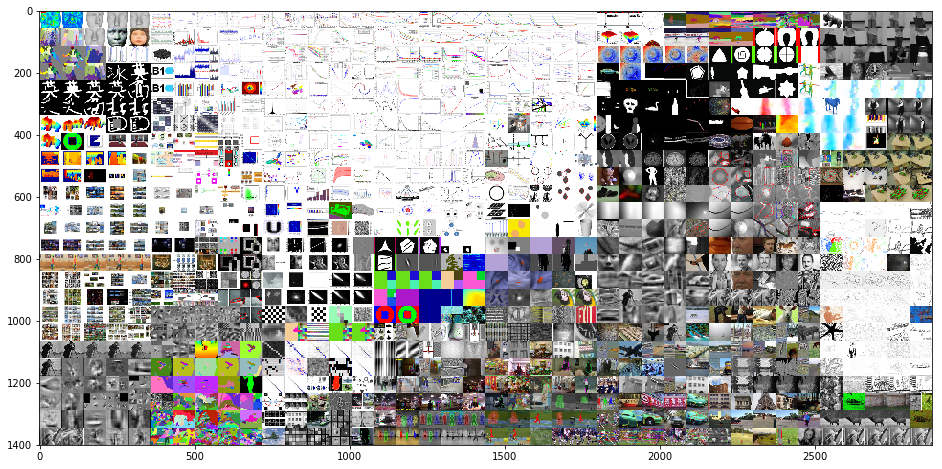

In [30]:
tile_width = 72
tile_height = 56

full_width = tile_width * nx
full_height = tile_height * ny
aspect_ratio = float(tile_width) / tile_height

grid_image = Image.new('RGB', (full_width, full_height))

for img, grid_pos in zip(images, grid_assignment[0]):
    idx_x, idx_y = grid_pos
    x, y = tile_width * idx_x, tile_height * idx_y
    tile = Image.open(img)
    tile_ar = float(tile.width) / tile.height  # center-crop the tile to match aspect_ratio
    if (tile_ar > aspect_ratio):
        margin = 0.5 * (tile.width - aspect_ratio * tile.height)
        tile = tile.crop((margin, 0, margin + aspect_ratio * tile.height, tile.height))
    else:
        margin = 0.5 * (tile.height - float(tile.width) / aspect_ratio)
        tile = tile.crop((0, margin, tile.width, margin + float(tile.width) / aspect_ratio))
    tile = tile.resize((tile_width, tile_height), Image.ANTIALIAS)
    grid_image.paste(tile, (int(x), int(y)))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(grid_image)

In [31]:
grid_image.save("tSNE_grid_cs.CV_2012_n1000.png")